In [1]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


In [1]:
from pyspark.sql import SparkSession

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("NASA_Project") \
    .getOrCreate()

# CSV file path
csv_file_path = r"C:\Users\Administrator\Downloads\NASA_ProjectUK\neo.csv"

# Read the CSV file into a DataFrame
df = spark.read.csv(csv_file_path, header=True, inferSchema=True)

# Show the DataFrame
df.show()




+--------+-------------------+----------------+----------------+-----------------+--------------------+-------------+-------------+------------------+---------+
|      id|               name|est_diameter_min|est_diameter_max|relative_velocity|       miss_distance|orbiting_body|sentry_object|absolute_magnitude|hazardous|
+--------+-------------------+----------------+----------------+-----------------+--------------------+-------------+-------------+------------------+---------+
| 2162635|162635 (2000 SS164)|    1.1982708007|    2.6794149658| 13569.2492241812| 5.483974408284605E7|        Earth|        false|             16.73|    false|
| 2277475|  277475 (2005 WK4)|          0.2658|    0.5943468684| 73588.7266634981| 6.143812652395093E7|        Earth|        false|              20.0|     true|
| 2512244| 512244 (2015 YE18)|    0.7220295577|    1.6145071727|114258.6921290512| 4.979872494045679E7|        Earth|        false|             17.83|    false|
| 3596030|        (2012 BV13)|    

##  Counting no of rows and columns in dataframe

In [38]:

# Perform data analysis tasks using PySpark
num_rows = df.count()
num_columns = len(df.columns)

# Print the results
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 90836
Number of columns: 10


## Summary of dataframe 

In [39]:
# Show the schema of the DataFrame
df.printSchema()

# Show summary statistics of numerical columns
num_summary = df.describe().toPandas()
print("Summary of Numerical Columns:")
print(num_summary)


root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- est_diameter_min: double (nullable = true)
 |-- est_diameter_max: double (nullable = true)
 |-- relative_velocity: double (nullable = true)
 |-- miss_distance: double (nullable = true)
 |-- orbiting_body: string (nullable = true)
 |-- sentry_object: boolean (nullable = true)
 |-- absolute_magnitude: double (nullable = true)
 |-- hazardous: boolean (nullable = true)

Summary of Numerical Columns:
  summary                    id                      name  \
0   count                 90836                     90836   
1    mean  1.4382878052159937E7                      None   
2  stddev   2.087201835389273E7                      None   
3     min               2000433                 (1983 LC)   
4     max              54275914  99942 Apophis (2004 MN4)   

      est_diameter_min    est_diameter_max   relative_velocity  \
0                90836               90836               90836   
1   0.127432106315222

## Checking the no of null values

In [40]:
from pyspark.sql.functions import col, sum as spark_sum
# Calculate the number of null values for each column
null_counts = df.select([spark_sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])

# Show the null counts
null_counts.show()

+---+----+----------------+----------------+-----------------+-------------+-------------+-------------+------------------+---------+
| id|name|est_diameter_min|est_diameter_max|relative_velocity|miss_distance|orbiting_body|sentry_object|absolute_magnitude|hazardous|
+---+----+----------------+----------------+-----------------+-------------+-------------+-------------+------------------+---------+
|  0|   0|               0|               0|                0|            0|            0|            0|                 0|        0|
+---+----+----------------+----------------+-----------------+-------------+-------------+-------------+------------------+---------+



### Dropping the duplicate data if any 

In [41]:
df = df.dropDuplicates()

In [42]:
# Perform data analysis tasks using PySpark
num_rows = df.count()
num_columns = len(df.columns)

# Print the results
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 90836
Number of columns: 10


### Unique value count of every column

In [43]:
from pyspark.sql.functions import col, countDistinct
# List of columns
columns = df.columns

# Calculate the number of unique values in each column
unique_counts = [countDistinct(col(column)).alias(column + '_unique') for column in columns]

# Aggregate the unique counts into a single row
unique_counts_df = df.agg(*unique_counts)

# Show the result
unique_counts_df.show()

+---------+-----------+-----------------------+-----------------------+------------------------+--------------------+--------------------+--------------------+-------------------------+----------------+
|id_unique|name_unique|est_diameter_min_unique|est_diameter_max_unique|relative_velocity_unique|miss_distance_unique|orbiting_body_unique|sentry_object_unique|absolute_magnitude_unique|hazardous_unique|
+---------+-----------+-----------------------+-----------------------+------------------------+--------------------+--------------------+--------------------+-------------------------+----------------+
|    27423|      27423|                   1638|                   1638|                   90828|               90536|                   1|                   1|                     1638|               2|
+---------+-----------+-----------------------+-----------------------+------------------------+--------------------+--------------------+--------------------+-------------------------+---

### From the code above, it's clear that most of the asteroids orbiting the earth are of the same size in both maximum and minimum estimated diameter.

## Univariate Plots of Numeric Type Data

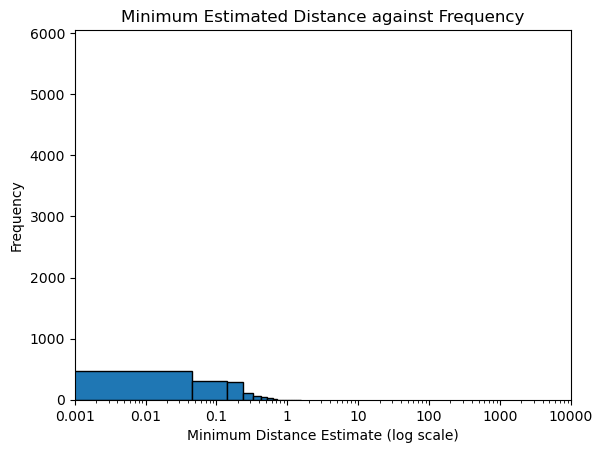

In [45]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import log10
import matplotlib.pyplot as plt
import numpy as np

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Data_Visualization") \
    .getOrCreate()

# Assuming you already have a DataFrame named 'df'

# Calculate log10 of est_diameter_min
df = df.withColumn("log_est_diameter_min", log10("est_diameter_min"))

# Convert Spark DataFrame to Pandas DataFrame for visualization
pandas_df = df.select("log_est_diameter_min").toPandas()

# Plotting a Histogram of minimum estimated distance using log scale transformation on the x axis.
num_bins = 50  # Adjust the number of bins as needed
plt.hist(pandas_df["log_est_diameter_min"], bins=num_bins, edgecolor='k')
plt.xlabel('Minimum Distance Estimate (log scale)')
plt.ylabel('Frequency')
plt.xscale('log')
x_ticks = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
plt.xticks(ticks=x_ticks, labels=x_ticks)
plt.title('Minimum Estimated Distance against Frequency')

# Display the plot
plt.show()




In [46]:
df

DataFrame[id: int, name: string, est_diameter_min: double, est_diameter_max: double, relative_velocity: double, miss_distance: double, orbiting_body: string, sentry_object: boolean, absolute_magnitude: double, hazardous: boolean, log_est_diameter_min: double]

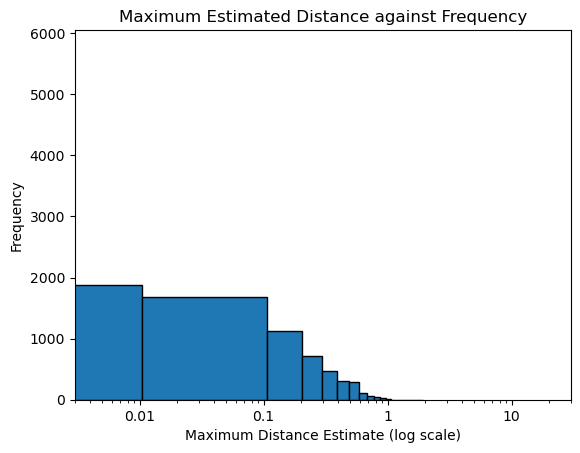

In [47]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import log10
import matplotlib.pyplot as plt
import numpy as np

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Data_Visualization") \
    .getOrCreate()

# Assuming you already have a DataFrame named 'df'

# Calculate log10 of est_diameter_max
df = df.withColumn("log_est_diameter_max", log10("est_diameter_max"))

# Convert Spark DataFrame to Pandas DataFrame for visualization
pandas_df = df.select("log_est_diameter_max").toPandas()

# Plotting a Histogram of maximum estimated distance using log scale transformation on the x axis.
num_bins = 50  # Adjust the number of bins as needed
plt.hist(pandas_df["log_est_diameter_max"], bins=num_bins, edgecolor='k')
plt.xlabel('Maximum Distance Estimate (log scale)')
plt.ylabel('Frequency')
plt.xscale('log')
x_ticks = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
plt.xticks(ticks=x_ticks, labels=x_ticks)
plt.xlim(0.003, 30)
plt.title('Maximum Estimated Distance against Frequency')

# Display the plot
plt.show()



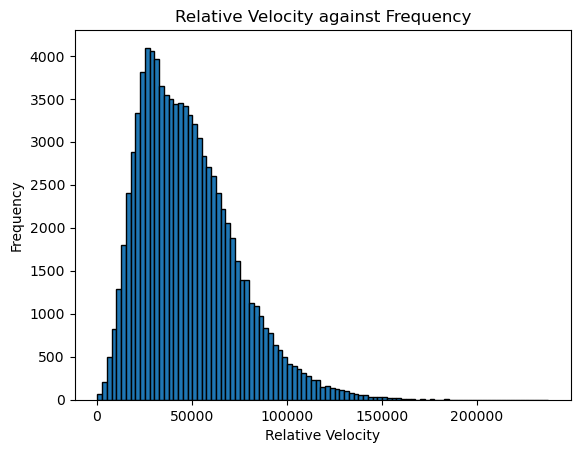

In [48]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import numpy as np

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Data_Visualization") \
    .getOrCreate()

# Assuming you already have a DataFrame named 'df'

# Convert Spark DataFrame to Pandas DataFrame for visualization
pandas_df = df.select("relative_velocity").toPandas()

# Calculate bins for the histogram
bins = np.arange(pandas_df["relative_velocity"].min(), pandas_df["relative_velocity"].max() + 2500, 2500)

# Plotting a Histogram of distribution of relative velocities
plt.hist(pandas_df["relative_velocity"], bins=bins, edgecolor='k')
plt.xlabel('Relative Velocity')
plt.ylabel('Frequency')
plt.title('Relative Velocity against Frequency')

# Display the plot
plt.show()



#### For the plot above, since there are 90836 unique values, I will use the original dataset to see the distribution of the relative velocities in the dataset. The plot shows that the relative velocity of the asteroids is skewed to the right meaning that the mean and the mode have a significant difference, where the mean is shifted to the right.

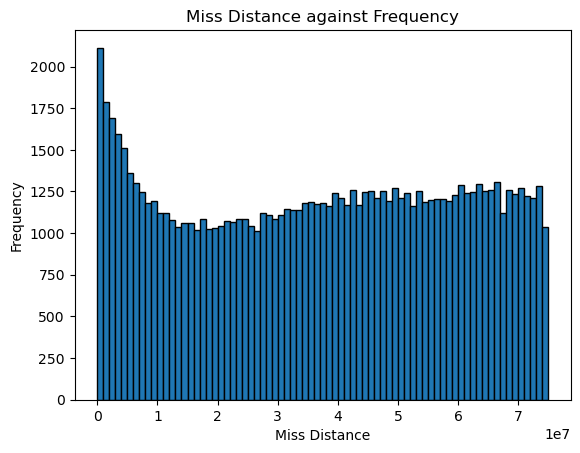

In [3]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import numpy as np

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Data_Visualization") \
    .getOrCreate()

# Assuming you already have a DataFrame named 'df'

# Convert Spark DataFrame to Pandas DataFrame for visualization
pandas_df = df.select("miss_distance").toPandas()

# Calculate bins for the histogram
bins = np.arange(pandas_df["miss_distance"].min(), pandas_df["miss_distance"].max() + 1000000, 1000000)

# Plotting a Histogram of distribution of miss distances
plt.hist(pandas_df["miss_distance"], bins=bins, edgecolor='k')
plt.xlabel('Miss Distance')
plt.ylabel('Frequency')
plt.title('Miss Distance against Frequency')

# Display the plot
plt.show()



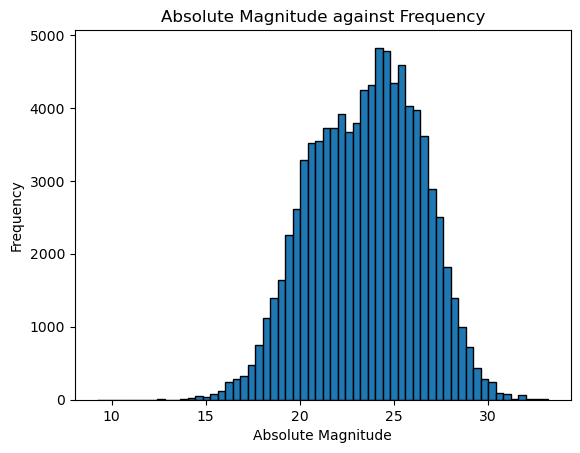

In [4]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import numpy as np

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Data_Visualization") \
    .getOrCreate()

# Assuming you already have a DataFrame named 'df'

# Convert Spark DataFrame to Pandas DataFrame for visualization
pandas_df = df.select("absolute_magnitude").toPandas()

# Calculate bins for the histogram
bins = np.arange(pandas_df["absolute_magnitude"].min(), pandas_df["absolute_magnitude"].max() + 0.4, 0.4)

# Plotting a Histogram of distribution of absolute magnitudes
plt.hist(pandas_df["absolute_magnitude"], bins=bins, edgecolor='k')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Frequency')
plt.title('Absolute Magnitude against Frequency')

# Display the plot
plt.show()



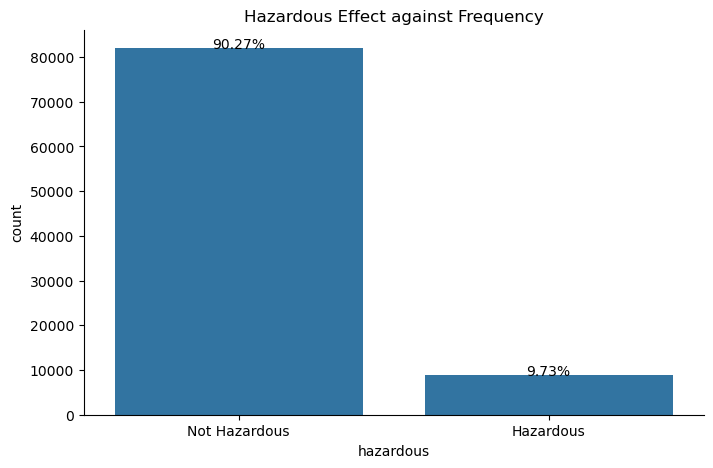

In [8]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Data_Visualization") \
    .getOrCreate()

# Assuming you already have a DataFrame named 'df'

# Convert Spark DataFrame to Pandas DataFrame for visualization
pandas_df = df.select("hazardous").toPandas()

# Convert boolean values to lowercase strings for visualization
pandas_df['hazardous'] = pandas_df['hazardous'].apply(lambda x: 'true' if x else 'false')

# Create a bar graph showing how hazardous the asteroids could be
ax = plt.figure(figsize=(8, 5)).subplots()
base_color = sns.color_palette()[0]

# Explicitly set the order of the x-axis ticks
order = ['false', 'true']
sns.countplot(data=pandas_df, x='hazardous', color=base_color, order=order)
ax.spines[['top', 'right']].set_visible(False)

# Calculate value counts and plot percentages
hazardous_counts = pandas_df['hazardous'].value_counts()
locs, labels = plt.xticks()
for loc, label in zip(locs, labels):
    count = hazardous_counts[label.get_text()]
    percentage = '{:.2f}%'.format((count * 100) / hazardous_counts.sum())
    plt.text(loc, count, percentage, ha='center', va='baseline')

# Set labels for x-axis ticks
plt.xticks(locs, ['Not Hazardous', 'Hazardous'])

plt.title('Hazardous Effect against Frequency')

# Display the plot
plt.show()




### The plot above shows the hazardous effect of the asteroid by percentage. The majority of the asteroid are not hazardous.

## Bivariate Plots

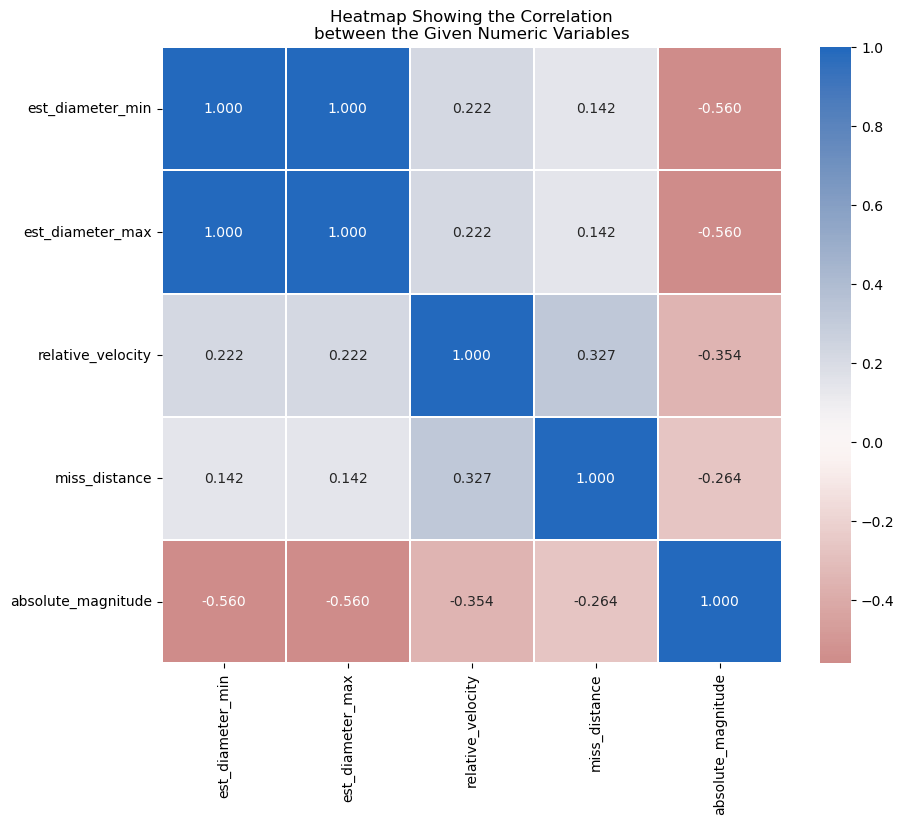

In [9]:
from pyspark.sql import SparkSession
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Correlation_Heatmap") \
    .getOrCreate()

# Assuming you already have a DataFrame named 'df'

# Select the numeric variables
numeric_vars = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']

# Calculate the correlation matrix
correlation_matrix = df.select(numeric_vars).toPandas().corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, fmt='.3f', center=0, cmap='vlag_r', linewidths=0.2)
plt.title('Heatmap Showing the Correlation\nbetween the Given Numeric Variables')

# Display the plot
plt.show()




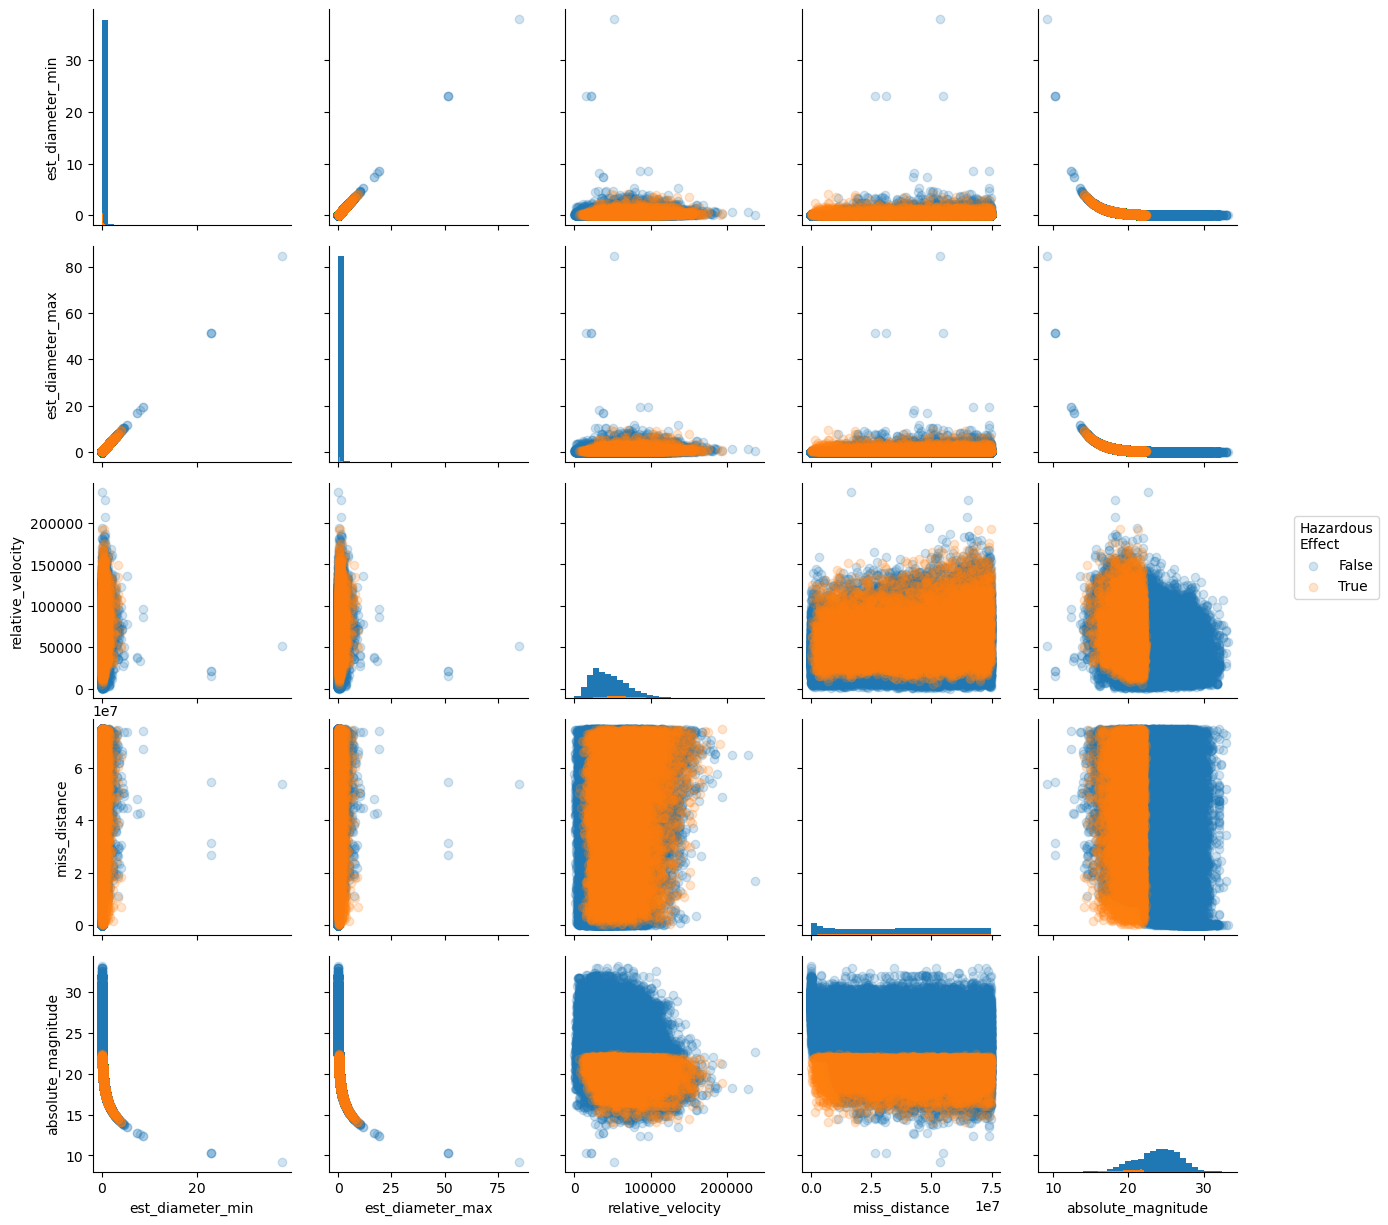

In [10]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("PairGrid") \
    .getOrCreate()

# Assuming you already have a DataFrame named 'df'

# Select the numeric variables
numeric_vars = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']

# Convert Spark DataFrame to Pandas DataFrame for visualization
pandas_df = df.select(numeric_vars + ['hazardous']).toPandas()

# Create a PairGrid
g = sns.PairGrid(data=pandas_df, vars=numeric_vars, hue='hazardous')

# Map scatter plots and histograms
g.map_diag(plt.hist, bins=30)
g.map_offdiag(plt.scatter, alpha=1/5)

# Adjust the legend
plt.legend(loc='center right', title='Hazardous\nEffect', bbox_to_anchor=(1.75, 1.75))

# Display the plot
plt.show()



In [11]:
from pyspark.sql import SparkSession

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Filtering") \
    .getOrCreate()

# Assuming you already have a DataFrame named 'df'

# Create boolean conditions for hazardous and non-hazardous
hazardous = df.filter(df.hazardous == True)
hazardous_not = df.filter(df.hazardous == False)





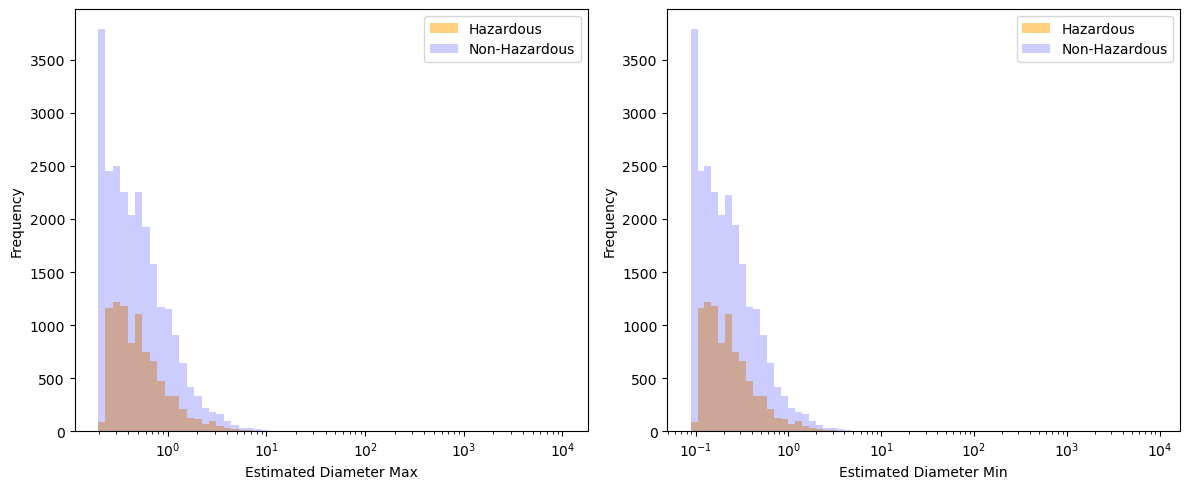

In [12]:
from pyspark.sql import SparkSession
import numpy as np
import matplotlib.pyplot as plt

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Histogram_Plotting") \
    .getOrCreate()

# Assuming you already have a DataFrame named 'df'
# And you've already created 'hazardous' and 'hazardous_not' DataFrames

# Convert Spark DataFrames to Pandas DataFrames for visualization
pandas_hazardous = hazardous.select("est_diameter_max", "est_diameter_min").toPandas()
pandas_hazardous_not = hazardous_not.select("est_diameter_max", "est_diameter_min").toPandas()

# Create subplots
plt.figure(figsize=(12, 5))

# First subplot
plt.subplot(1, 2, 1)
x = np.log10(pandas_hazardous['est_diameter_max'].describe())
bins = 10 ** np.arange(x.min(), x.max()+0.075, 0.075)
plt.hist(pandas_hazardous['est_diameter_max'], bins=bins, color='orange', alpha=1/2, label='Hazardous')
plt.hist(pandas_hazardous_not['est_diameter_max'], bins=bins, color='blue', alpha=1/5, label='Non-Hazardous')
plt.xscale('log')
plt.xlabel('Estimated Diameter Max')
plt.ylabel('Frequency')
plt.legend()

# Second subplot
plt.subplot(1, 2, 2)
x = np.log10(pandas_hazardous['est_diameter_min'].describe())
bins = 10 ** np.arange(x.min(), x.max()+0.075, 0.075)
plt.hist(pandas_hazardous['est_diameter_min'], bins=bins, color='orange', alpha=1/2, label='Hazardous')
plt.hist(pandas_hazardous_not['est_diameter_min'], bins=bins, color='blue', alpha=1/5, label='Non-Hazardous')
plt.xscale('log')
plt.xlabel('Estimated Diameter Min')
plt.ylabel('Frequency')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()



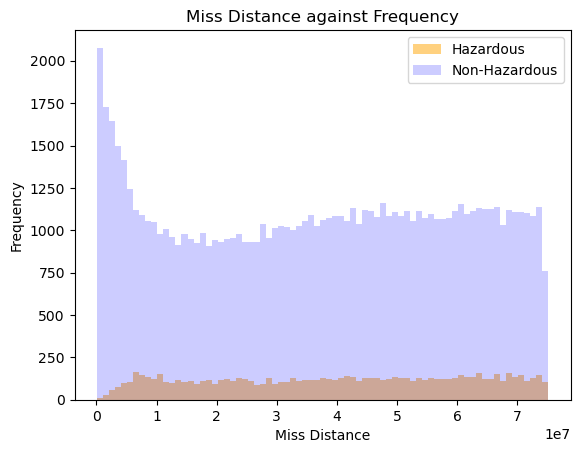

In [13]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("MissDistanceHistogram") \
    .getOrCreate()

# Assuming you already have a DataFrame named 'df'
# And you've already created 'hazardous' and 'hazardous_not' DataFrames

# Convert Spark DataFrames to Pandas DataFrames for visualization
pandas_hazardous = hazardous.select("miss_distance").toPandas()
pandas_hazardous_not = hazardous_not.select("miss_distance").toPandas()

# Create bins for the histogram
bins = list(range(int(pandas_hazardous['miss_distance'].min()), int(pandas_hazardous['miss_distance'].max()) + 1000000, 1000000))

# Plotting using Matplotlib
plt.hist(pandas_hazardous['miss_distance'], bins=bins, color='orange', alpha=1/2, label='Hazardous')
plt.hist(pandas_hazardous_not['miss_distance'], bins=bins, color='blue', alpha=1/5, label='Non-Hazardous')
plt.xlabel('Miss Distance')
plt.ylabel('Frequency')
plt.title('Miss Distance against Frequency')
plt.legend()

# Display the plot
plt.show()




#### From the 2 figures above, it\'s evident that most of the asteroids regardless of the size and miss distance, they are not hazardous. The number of those that are hazardous in the plot above does not exceed 55.

### Scatter plots showing the relationship between minimum and maximum estimated diameters with relative velocities
### over different y limits.


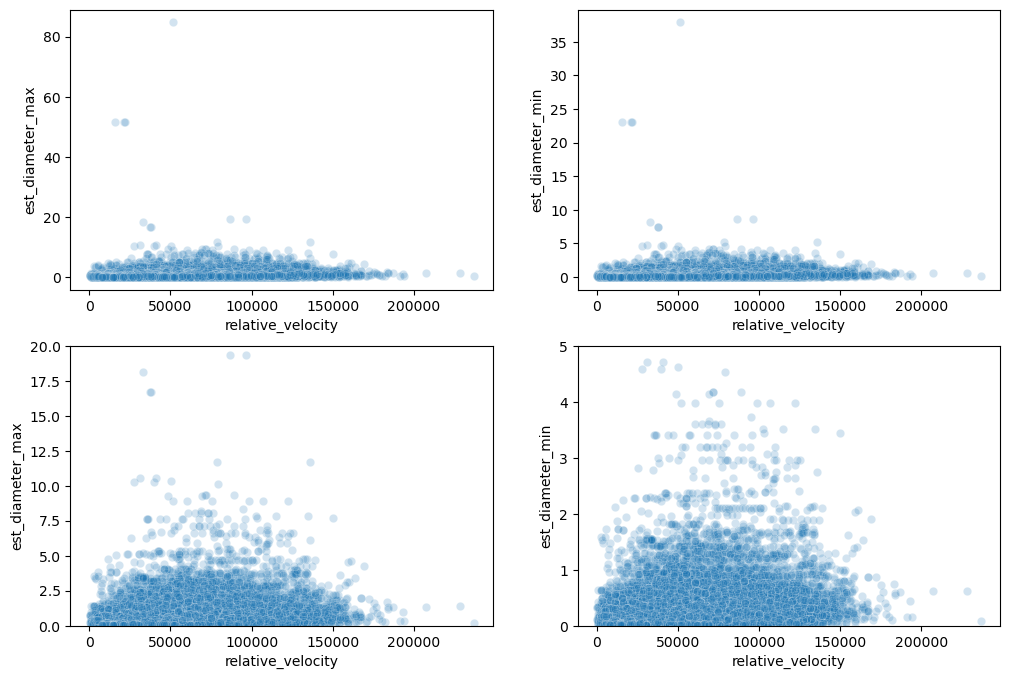

In [14]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("ScatterPlots") \
    .getOrCreate()

# Assuming you already have a DataFrame named 'df'

# Convert Spark DataFrame to Pandas DataFrame for visualization
pandas_df = df.select("relative_velocity", "est_diameter_max", "est_diameter_min").toPandas()

# Create scatter plots using Seaborn and Matplotlib
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(data=pandas_df, x='relative_velocity', y='est_diameter_max', alpha=1/5)
plt.subplot(2, 2, 3)
sns.scatterplot(data=pandas_df, x='relative_velocity', y='est_diameter_max', alpha=1/5)
plt.ylim(0, 20)

plt.subplot(2, 2, 2)
sns.scatterplot(data=pandas_df, x='relative_velocity', y='est_diameter_min', alpha=1/5)
plt.subplot(2, 2, 4)
sns.scatterplot(data=pandas_df, x='relative_velocity', y='est_diameter_min', alpha=1/5)
plt.ylim(0, 5)

# Display the plots
plt.show()




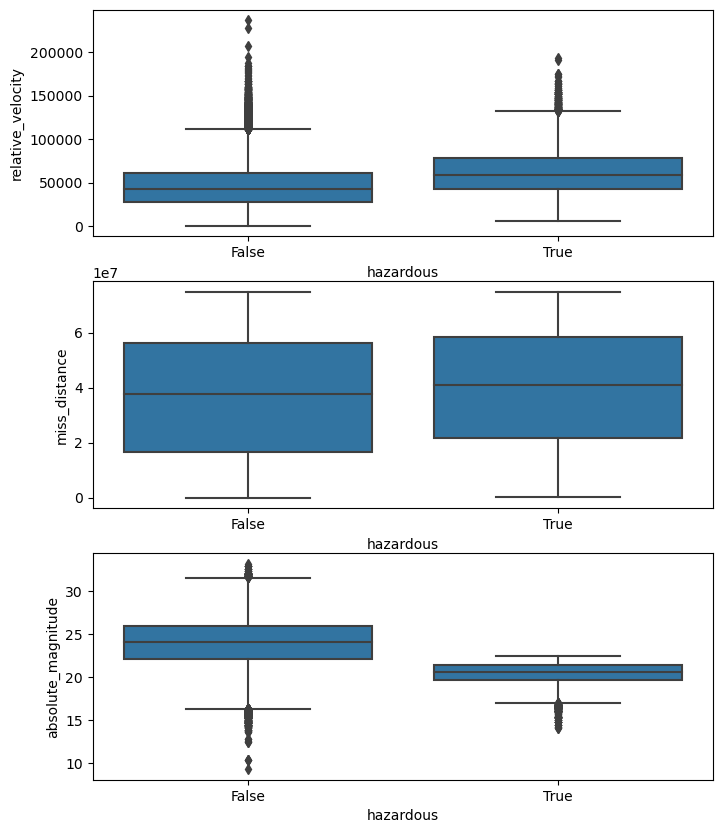

In [15]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("BoxPlots") \
    .getOrCreate()

# Assuming you already have a DataFrame named 'df'

# Convert Spark DataFrame to Pandas DataFrame for visualization
pandas_df = df.select("hazardous", "relative_velocity", "miss_distance", "absolute_magnitude").toPandas()

# Create boxplots using Seaborn and Matplotlib
fig, ax = plt.subplots(nrows=3, figsize=(8, 10))
sns.boxplot(data=pandas_df, x='hazardous', y='relative_velocity', color=base_color, ax=ax[0])
sns.boxplot(data=pandas_df, x='hazardous', y='miss_distance', color=base_color, ax=ax[1])
sns.boxplot(data=pandas_df, x='hazardous', y='absolute_magnitude', color=base_color, ax=ax[2])

# Display the plots
plt.show()




## Multivariate Plot

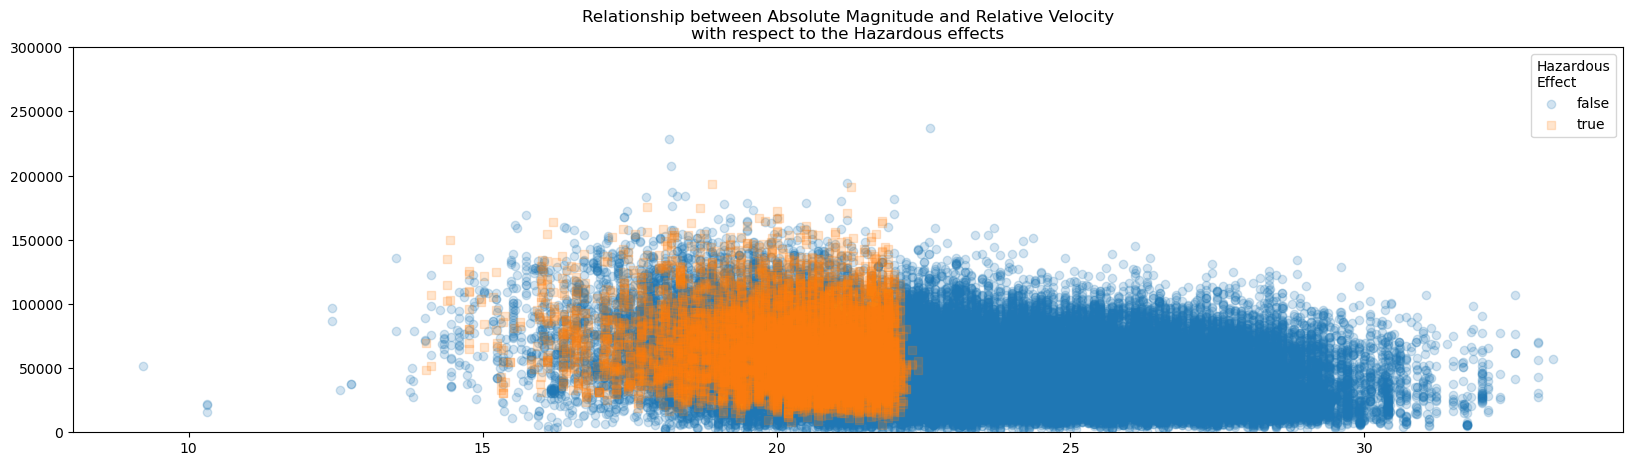

In [21]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("ScatterPlots") \
    .getOrCreate()

# Assuming you already have a DataFrame named 'df'

# Define markers for different categories
markers = [['false', 'o'], ['true', 's']]

plt.figure(figsize=(20, 5))

# Loop through markers and create scatter plots
for cat, marker in markers:
    cat_df = df.filter(df.hazardous == cat).select("absolute_magnitude", "relative_velocity").toPandas()
    plt.scatter(cat_df['absolute_magnitude'], cat_df['relative_velocity'],
                marker=marker, alpha=1/5, label=cat)

# Set y-axis limits to show the entire range of 'absolute_magnitude'
plt.ylim(0, 300000)

plt.title('Relationship between Absolute Magnitude and Relative Velocity\nwith respect to the Hazardous effects')
plt.legend(loc='upper right', title='Hazardous\nEffect')

# Display the plot
plt.show()




####  In the plot above, all hazardous asteroids had an absolute magnitude below 22.5. However, most of those asteroids had a wide range in the relative velocities given though the majority of them had a relative velocity below 100,000.

## Classification analysis

In [2]:

# List of columns to drop
columns_to_drop = ['id', 'name', 'orbiting_body', 'sentry_object']

# Drop the specified columns
df = df.drop(*columns_to_drop)

# Show the resulting DataFrame
df.show()

+----------------+----------------+-----------------+--------------------+------------------+---------+
|est_diameter_min|est_diameter_max|relative_velocity|       miss_distance|absolute_magnitude|hazardous|
+----------------+----------------+-----------------+--------------------+------------------+---------+
|    1.1982708007|    2.6794149658| 13569.2492241812| 5.483974408284605E7|             16.73|    false|
|          0.2658|    0.5943468684| 73588.7266634981| 6.143812652395093E7|              20.0|     true|
|    0.7220295577|    1.6145071727|114258.6921290512| 4.979872494045679E7|             17.83|    false|
|     0.096506147|    0.2157943048| 24764.3031380016| 2.543497272075825E7|              22.2|    false|
|    0.2550086879|    0.5702167609| 42737.7337647264| 4.627556700130072E7|             20.09|     true|
|    0.0363542322|    0.0812905344| 34297.5877783029| 4.058569122792288E7|             24.32|    false|
|    0.1716148941|    0.3837425691| 27529.4723069673| 2.90691214

## 1.Logistic Regression model

In [7]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Create a Spark session
spark = SparkSession.builder.appName("ClassificationTask").getOrCreate()

# Define the feature columns
feature_columns = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']

# Define the target column
target_column = 'hazardous'

# Assemble features into a vector column
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
data_with_features = assembler.transform(df)

# Split the data into training and testing sets
train_data, test_data = data_with_features.randomSplit([0.8, 0.2], seed=123)

# Create a Logistic Regression model
lr = LogisticRegression(featuresCol='features', labelCol=target_column)

# Train the model
lr_model = lr.fit(train_data)

# Make predictions on the test data
predictions = lr_model.transform(test_data)

# Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol=target_column)
accuracy = evaluator.evaluate(predictions)

print(f"Accuracy: {accuracy}")




Accuracy: 0.8801170274409174


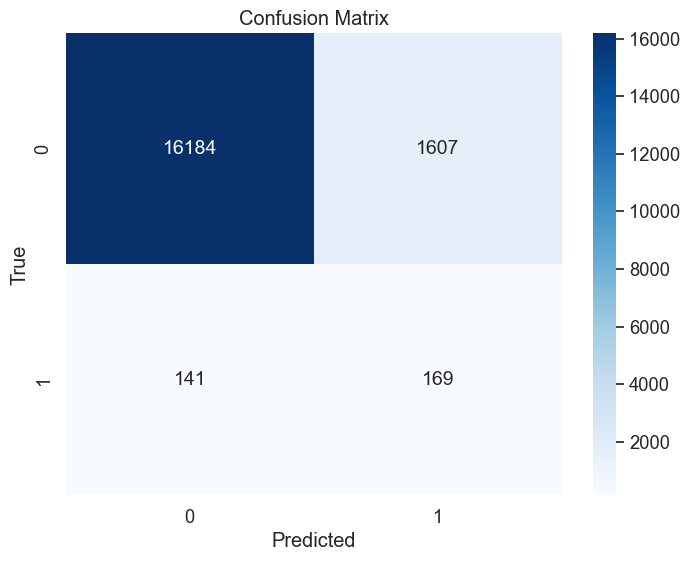

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Collect predictions and labels from the DataFrame
prediction_and_labels = np.array(predictions.select("prediction", target_column).collect())

# Calculate the confusion matrix
conf_matrix = confusion_matrix(prediction_and_labels[:, 0], prediction_and_labels[:, 1])

# Create a seaborn heatmap for visualization
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## 2.RandomForestClassification

Accuracy: 0.9093709559482913


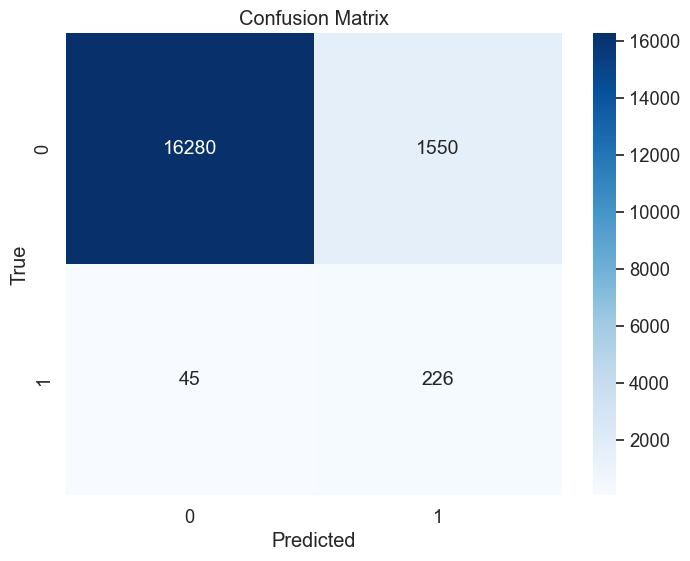

In [10]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Create a Spark session
spark = SparkSession.builder.appName("RandomForestClassification").getOrCreate()

# Define the feature columns
feature_columns = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']

# Define the target column
target_column = 'hazardous'

# Assemble features into a vector column
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
data_with_features = assembler.transform(df)

# Split the data into training and testing sets
train_data, test_data = data_with_features.randomSplit([0.8, 0.2], seed=123)

# Create a Random Forest classifier model
rf = RandomForestClassifier(featuresCol='features', labelCol=target_column)

# Train the model
rf_model = rf.fit(train_data)

# Make predictions on the test data
predictions = rf_model.transform(test_data)

# Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol=target_column)
accuracy = evaluator.evaluate(predictions)

print(f"Accuracy: {accuracy}")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Collect predictions and labels from the DataFrame
prediction_and_labels = np.array(predictions.select("prediction", target_column).collect())

# Calculate the confusion matrix
conf_matrix = confusion_matrix(prediction_and_labels[:, 0], prediction_and_labels[:, 1])

# Create a seaborn heatmap for visualization
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## 3.Gradient-Boosted Trees Classifier:

Accuracy: 0.9143519687374969


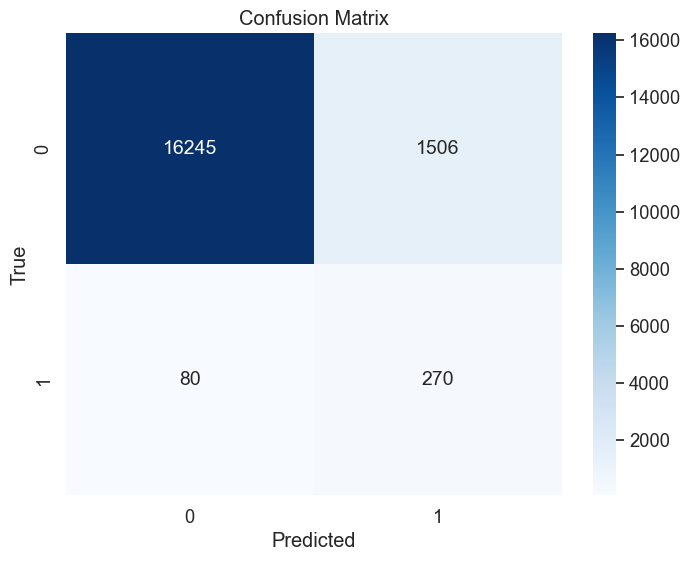

In [11]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Create a Spark session
spark = SparkSession.builder.appName("GBTClassification").getOrCreate()

# Define the feature columns
feature_columns = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']

# Define the target column
target_column = 'hazardous'

# Assemble features into a vector column
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
data_with_features = assembler.transform(df)

# Split the data into training and testing sets
train_data, test_data = data_with_features.randomSplit([0.8, 0.2], seed=123)

# Create a Gradient-Boosted Trees classifier model
gbt = GBTClassifier(featuresCol='features', labelCol=target_column)

# Train the model
gbt_model = gbt.fit(train_data)

# Make predictions on the test data
predictions = gbt_model.transform(test_data)

# Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol=target_column)
accuracy = evaluator.evaluate(predictions)

print(f"Accuracy: {accuracy}")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Collect predictions and labels from the DataFrame
prediction_and_labels = np.array(predictions.select("prediction", target_column).collect())

# Calculate the confusion matrix
conf_matrix = confusion_matrix(prediction_and_labels[:, 0], prediction_and_labels[:, 1])

# Create a seaborn heatmap for visualization
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



## 4.Decision Tree Classifier:

Accuracy: 0.865815122166577


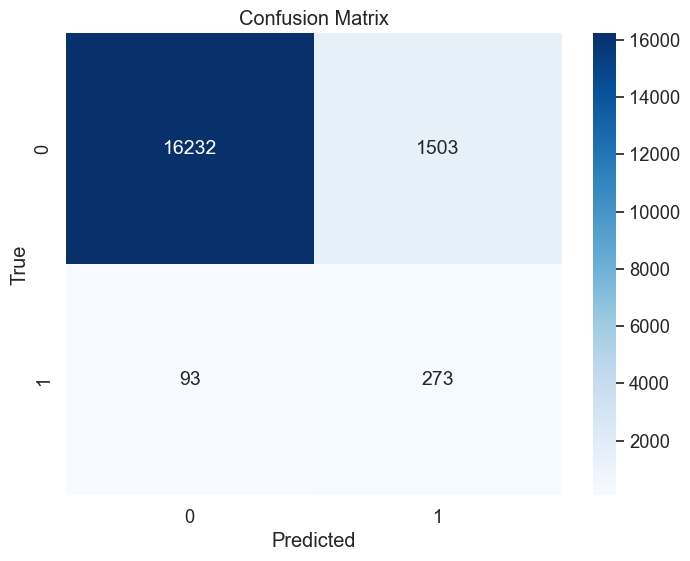

In [12]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Create a Spark session
spark = SparkSession.builder.appName("DecisionTreeClassification").getOrCreate()

# Define the feature columns
feature_columns = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']

# Define the target column
target_column = 'hazardous'

# Assemble features into a vector column
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
data_with_features = assembler.transform(df)

# Split the data into training and testing sets
train_data, test_data = data_with_features.randomSplit([0.8, 0.2], seed=123)

# Create a Decision Tree classifier model
dt = DecisionTreeClassifier(featuresCol='features', labelCol=target_column)

# Train the model
dt_model = dt.fit(train_data)

# Make predictions on the test data
predictions = dt_model.transform(test_data)

# Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol=target_column)
accuracy = evaluator.evaluate(predictions)

print(f"Accuracy: {accuracy}")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Collect predictions and labels from the DataFrame
prediction_and_labels = np.array(predictions.select("prediction", target_column).collect())

# Calculate the confusion matrix
conf_matrix = confusion_matrix(prediction_and_labels[:, 0], prediction_and_labels[:, 1])

# Create a seaborn heatmap for visualization
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Stop the Spark session
spark.stop()


### Overall, it appears that  best-performing models are the Gradient-Boosted Trees Classifier and the Random Forest classifier, as they have the highest accuracy scores. 